In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Q1
#read articleInfo.csv
df_1 = pd.read_csv("articleInfo.csv")
df_1

#read authorInfo.csv
df_2 = pd.read_csv("authorInfo.csv")
df_2

#merge two csv using Article No. into one dataframe
df_merged = pd.merge(df_1, df_2, how='left', on='Article No.')

#fill all empty cells with 0, inplace to persist changes in dataframe, downcast = integer
df_merged.fillna(0, inplace=True, downcast='infer')

#Print the head table
df_merged.head()

df_merged




# df_merged.to_csv('merged.csv')
# df_merged2.to_csv('chrismerged.csv')
#check if there is any empty cells
# np.where(pd.isnull(df_merged))
# print(np)

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2,virtual reality; learning; immersive media tec...,3,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2,virtual reality; learning; immersive media tec...,3,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,160,Virtual reality enhances safety training in th...,2022,2,non-WEIRD sample; safety training; simulation;...,3,Journal of Computer Assisted Learning,Objective: Many industries struggle with train...,Journal,0,0,0,0
467,161,Virtual reality for developing intercultural c...,2022,3,Affective domain; Cultural competence; Instruc...,1,Educational Technology Research & Development,Intercultural communicative competence (ICC) i...,Journal,0,0,0,0
468,162,Virtual reality in problem-based learning cont...,2021,3,English learning; motivation; problem-based le...,27,Journal of Computer Assisted Learning,Learning a foreign language requires interacti...,Journal,0,0,0,0
469,163,Virtual reality is more efficient in learning ...,2020,8,Virtual reality; Education; Human heart anatomy,36,New Ideas in Psychology,New technologies make their way into education...,Journal,0,0,0,0


Text(0.5, 1.0, 'yearly_publication')

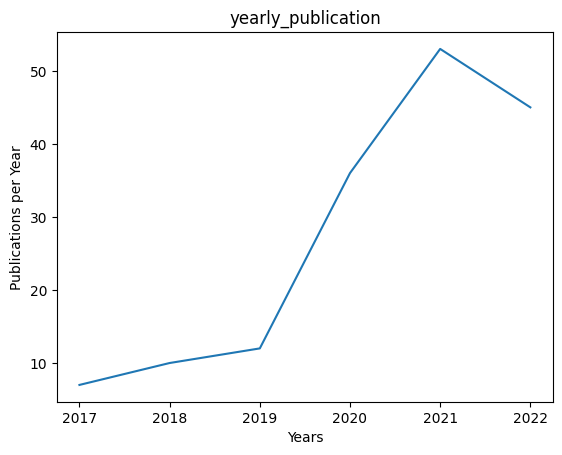

In [33]:
'''
Q1-1: Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is
the number of articles published during that year.
'''

#x-axis = years 
x = df_merged["Year"].unique()

#Sort by earliest to latest years
x = sorted(x)[1:]

y = df_merged.groupby("Year")["Article No."].nunique()[1:]



#Plot 
plt.plot(x,y)

#Labeling graphs
plt.xlabel("Years")
plt.ylabel("Publications per Year")
plt.title("yearly_publication")

C:\Users\chris\AppData\Local\Temp\ipykernel_9116\944386374.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df_merged.groupby(by=["Year"]).sum()["Citation"]


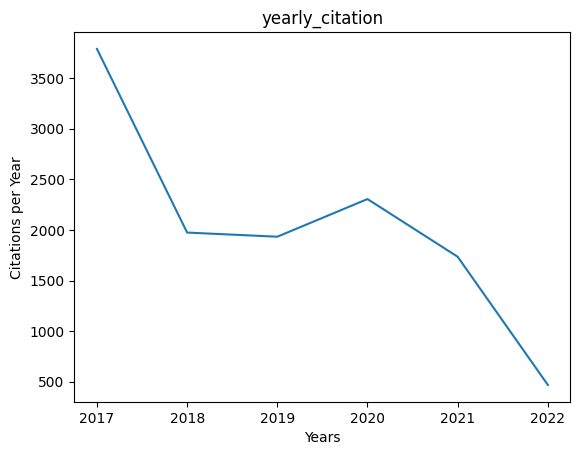

In [34]:
'''
Q1-2: Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the
total number of citations during that year.
'''

#x-axis = years
x = df_merged["Year"].unique()
x = sorted(x)[1:]
x

#y-axis = total citation per year
y = df_merged.groupby(by=["Year"]).sum()["Citation"]
y = y[1:]


#Labeling graphs
plt.xlabel("Years")
plt.ylabel("Citations per Year")
plt.title("yearly_citation")

#Plot
plt.plot(x,y)

In [35]:
#y-axis = total citation per year
y = df_merged.groupby(by=["Year"]).mean()["Citation"].values
y


C:\Users\chris\AppData\Local\Temp\ipykernel_9116\780883065.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df_merged.groupby(by=["Year"]).mean()["Citation"].values


array([  0.        , 291.38461538,  85.82608696,  74.34615385,
        24.78494624,  13.04511278,   2.57692308])

<BarContainer object of 39 artists>

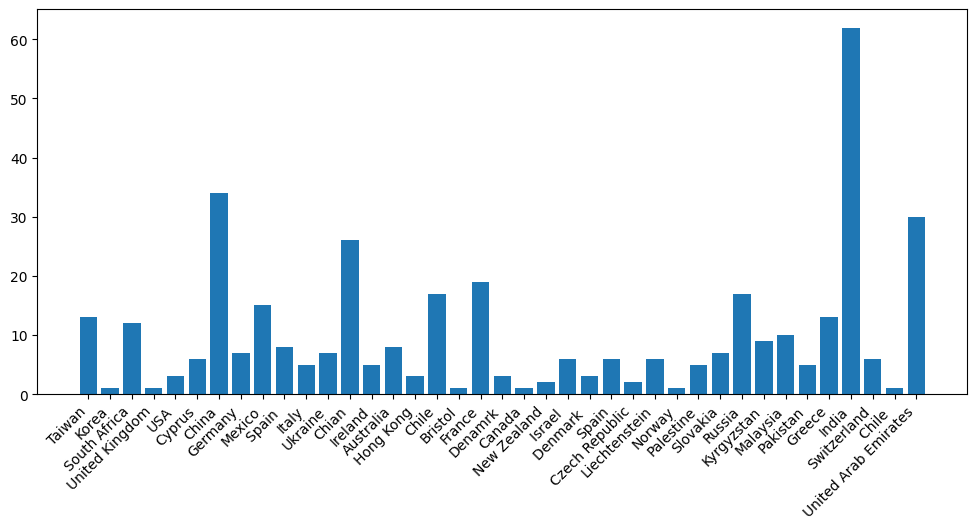

In [36]:
'''
Q1-3:Plot the figure of the number of publications across countries.
'''
# x-axis = country
countries = df_merged["Country"].unique()
x = countries.astype(str)
x = np.delete(x, np.where(x == '0'))
x


#y-axis = num of publications
y = df_merged.groupby(by=["Country"]).count()["Title"]
#drop the row with zero
y = y.drop(y.index[0]).values
y
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45, ha="right")
plt.bar(x,y)



In [37]:
'''
Q1-4: What are the top 5 institutions that have the most published articles in this
area?
'''

top_5_institutions = df_merged.groupby(by=["Author Affiliation"]).count()
top_5_institutions["Author Name"].nlargest(n=5)[1:]


Author Affiliation
University of the Western Cape    17
Masaryk University                12
Intel Corporation                 11
University College Cork           11
Name: Author Name, dtype: int64

In [38]:
'''
Q1-5: Who are the top 5 researchers that have the most h-index in this area?
'''
top_5_researchers = df_merged.groupby(by=["Author Name"]).sum()
top_5_researchers["h-index"].nlargest(n=5)


C:\Users\chris\AppData\Local\Temp\ipykernel_9116\2421442496.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_researchers = df_merged.groupby(by=["Author Name"]).sum()


Author Name
Ulrich Trautwein         95
Nicolas Molinari         63
George S. Athwal         59
Sellappan Palaniappan    48
Maria Luisa Lorusso      33
Name: h-index, dtype: int64

In [39]:
#Q2

#Read data.csv and drop teh empty column
df_data = pd.read_csv("data.csv")
df_data = df_data.drop(columns="Unnamed: 6")
df_data = df_data.fillna(0)

df_data

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3
...,...,...,...,...,...,...
95,0,57,358,0,13,7
96,1,93,71,0,3,0
97,0,80,34,1,0,9
98,1,82,49,1,4,1


In [40]:
#Compute Pair-wise correlations
print(df_data.corr(method='pearson')['SUS'].sort_values())


X = df_data.drop(['SUS'], axis=1)
Y = df_data['SUS']

print(X)
print(Y)

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64
    Purchase  Duration  Gender  ASR_Error  Intent_Error
0          1       254       0          3             2
1          0       247       0          6             9
2          0       125       1          6             8
3          0        22       0         11             7
4          1       262       0          2             3
..       ...       ...     ...        ...           ...
95         0       358       0         13             7
96         1        71       0          3             0
97         0        34       1          0             9
98         1        49       1          4             1
99         1       213       0          1             4

[100 rows x 5 columns]
0     84
1     58
2     56
3     55
4     95
      ..
95    57
96    93
97    80
98    82
99    78
Name: SUS, Length: 100, dtype

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

# (X_Train, Y_train), (X_test, Y_test)
#Train data = use to train machine
#Test data = use to check accuracy of model
# test_size = 0.2 (20% Test data and 80% Training data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,)


In [42]:
#Linear Regression model = Training 
model = LinearRegression().fit(X_train,Y_train)

#Y prediction use the X_Train values with the models
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(y_train_pred)
print(y_train_pred.shape)

#print(y_test_pred)


[60.96267928 74.66068627 64.27078126 85.62904736 66.71058787 80.54066634
 61.56390268 69.68168861 84.78499246 70.01332663 66.59122673 83.17662269
 82.27908026 77.72440439 68.02875938 75.55256443 86.76426632 60.92740028
 66.06672825 79.76955187 60.01606921 66.01564905 79.36463907 86.3468791
 62.91722093 70.02269541 84.6529807  62.03976632 80.64195122 91.26398624
 83.24902    68.10588107 74.84504752 92.34742473 71.70306967 52.85798073
 89.28016025 88.38533065 84.68655266 75.56468601 85.28860958 88.2607161
 70.07022825 68.16632905 84.71259514 75.44974473 90.26660146 65.60067014
 68.67804465 58.86522229 60.63108125 70.67753859 86.33847611 69.65153075
 65.09363892 88.67468923 82.68565618 83.62543806 61.06282614 63.985865
 56.77315096 79.79200802 76.52652727 90.41866105 73.74874619 78.49980647
 65.59056011 61.84800785 86.30249583 84.61244829 62.53069284 83.65218182
 71.64489776 84.60802842 88.66033156]
(75,)


In [43]:
#R Squared value of the linear regression model 
score_1 = model.score(X_test, Y_test)
print("The R square score of linear regression model is: ", score_1)


The R square score of linear regression model is:  0.6320400672814683


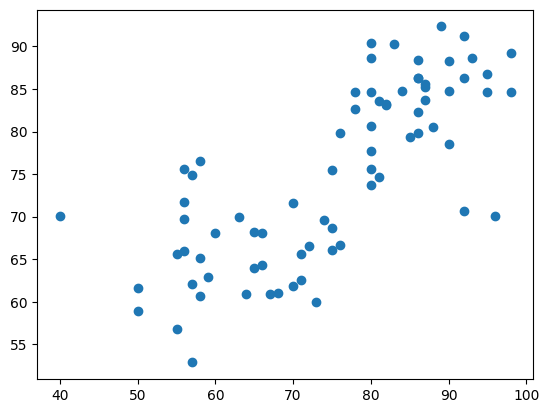

In [44]:
plt.scatter(Y_train, y_train_pred)

In [46]:
#Q3
from sklearn.preprocessing import StandardScaler

y = df_data['Purchase'].to_numpy()
y

X = df_data.drop('Purchase', axis = 1).to_numpy()
X

# Data Scaling
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc.fit(X_train, y_train)
neigh.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

In [48]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              preci